In [2]:
datasetFolder = "data/CWRfeatures stride8"
name = "CWRfeatures stride8"
isMatData = True
outFolder = "/home/aferral/"

In [3]:
import os
outFolder = os.path.join(outFolder,name)
if not os.path.exists(outFolder):
    os.makedirs(outFolder)

In [4]:
from infogan.misc.dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
import random

from sklearn.decomposition import PCA
import pandas
import seaborn as sns
from traditionalClusteringTests.dataUtils import showDimRed

from traditionalClusteringTests.dataUtils import flatInput,getNewDataset,inverseNorm, processPca,\
    showDataplots,simplemethodsresults, pca2Visua, showRandomImages,showMeanstd
%matplotlib inline

In [5]:
flattenDataset, flatTest, fTrainLabels, fTestLabels,dataset = getNewDataset(datasetFolder,seed=1,matDataset=isMatData)
nClases = dataset.getNclasses()

There are  1547  train points   so  77  batches
There are  663  val points 
There are  948  test points


Distribution of data 
Train set Counter({2: 745, 0: 368, 1: 341, 3: 93}) test set Counter({2: 443, 0: 234, 1: 222, 3: 49})
Pca with 2 components explained variance [ 0.37896911  0.10925113]
PCA 2 comp of the data


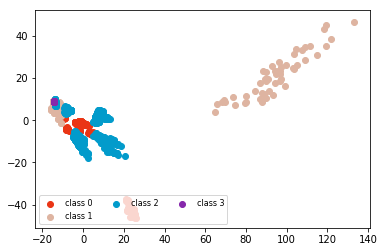

Pca with 2 components explained variance [ 0.37896911  0.10925113]
PCA 2 comp of the data


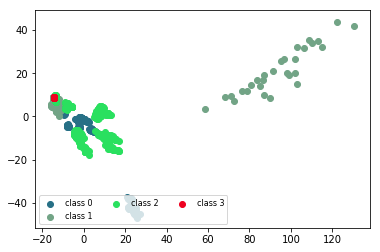

In [6]:
pca = PCA(n_components=2)
pca.fit(flattenDataset)


print "Distribution of data "
print dataset.classDistribution()

pca2Visua(pca,flattenDataset,fTrainLabels,nClases)
pca2Visua(pca,flatTest,fTestLabels,nClases)

Train image  P234FES26.mat
Test image  P234DES6.mat


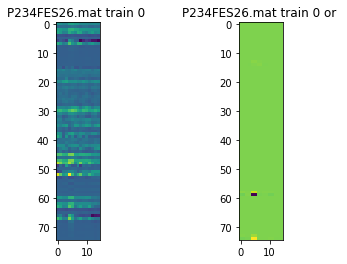

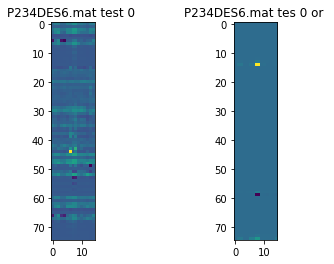

In [7]:
#Show first 1 images train and 1 image test (to show that seed changed)
#------------------TRAIN IAMGE
fname = dataset.getTrainFilename(0)
print "Train image ",fname

imTrain =   flattenDataset[0].reshape(dataset.getDataShape()[0:2])

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' train 0 ')
grid[0].imshow(imTrain)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imTrain,dataset)
grid[1].set_title(fname+' train 0 or ')
grid[1].imshow(org)

#------------------TEST IAMGE


fname = dataset.getTestFilename(0)
print "Test image ",fname
imgTest =   flatTest[0].reshape(dataset.getDataShape()[0:2])

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' test 0 ')
grid[0].imshow(imgTest)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imgTest,dataset)

grid[1].set_title(fname+' tes 0 or ')
grid[1].imshow(org)

Class  0
Class  1


Class  2
Class  3


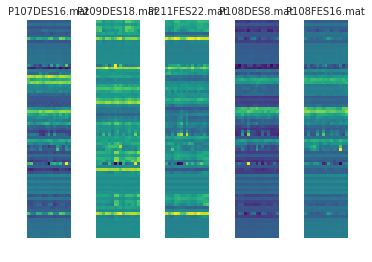

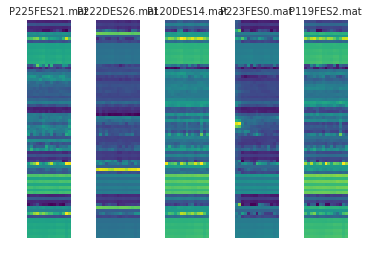

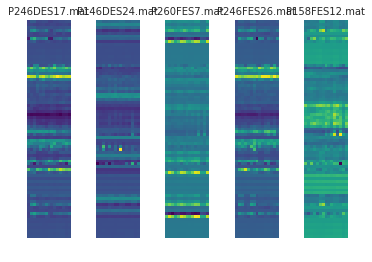

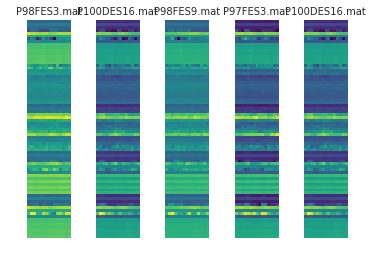

In [8]:
with sns.axes_style("white"):
    sns.set(rc={'image.cmap': "viridis"})
    showRandomImages(dataset,toShow=5)

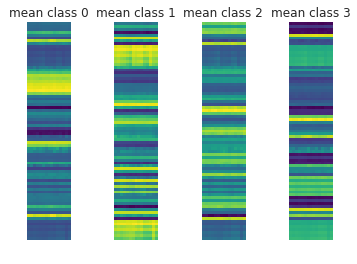

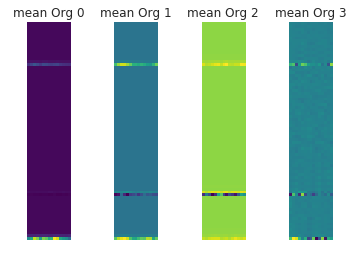

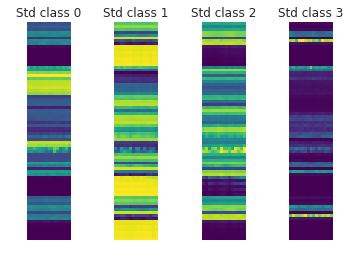

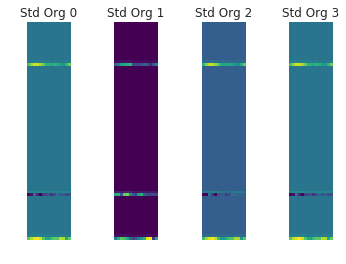

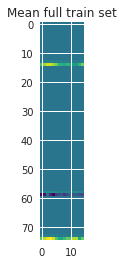

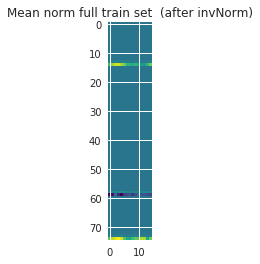

In [9]:
with sns.axes_style("white"):
    sns.set(rc={'image.cmap': "viridis"})
    showMeanstd(dataset)

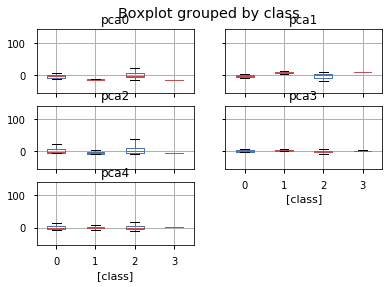

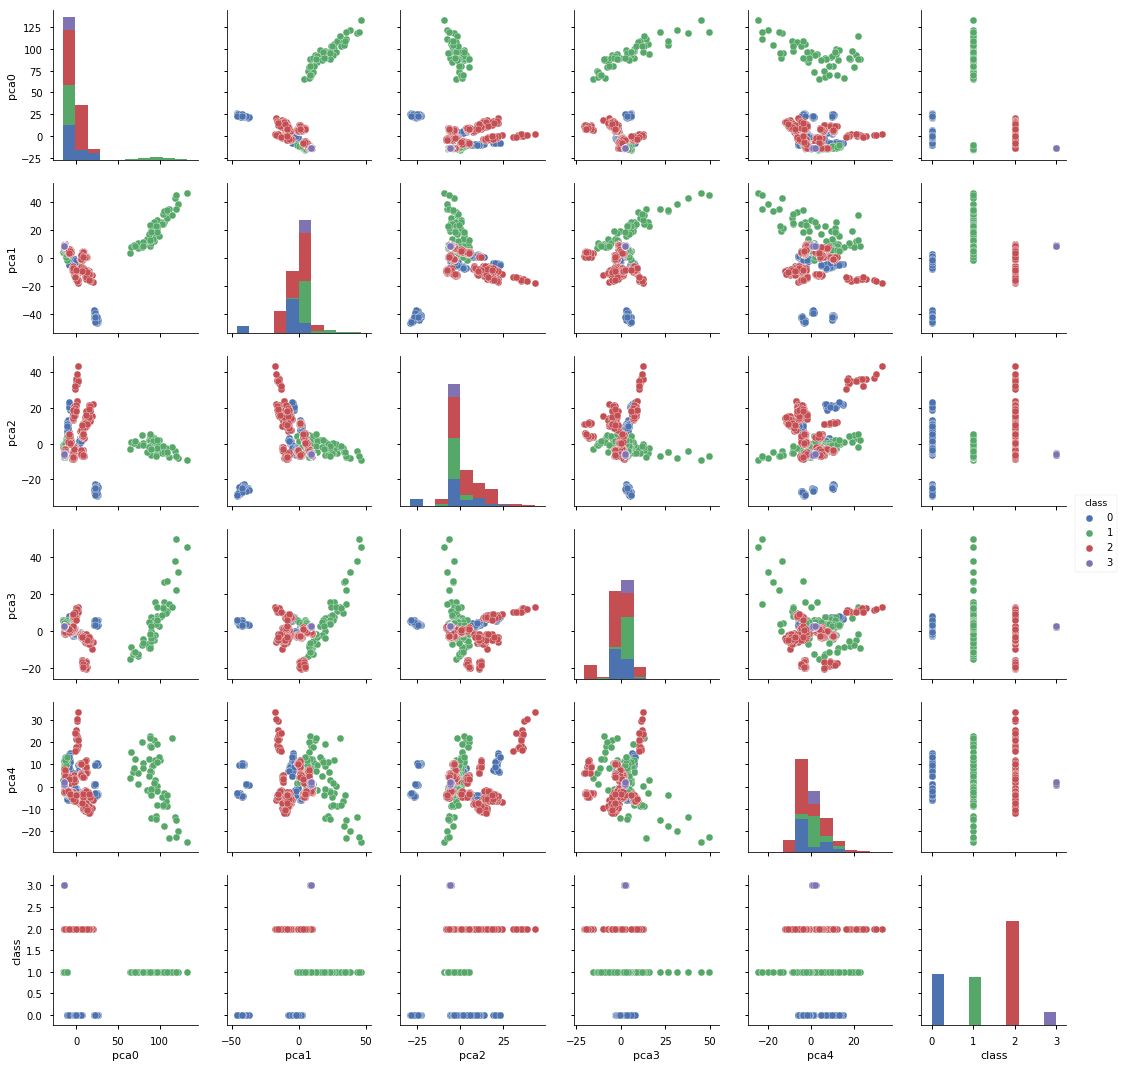

In [10]:
dx,dtestx,ltrain,ltest = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels,nComp = 5)
showDataplots(dx,ltrain)

In [11]:
from sklearn.cluster import MiniBatchKMeans


def processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels,clusteringAlg):

    if hasattr(clusteringAlg, 'predict'):
        clusteringAlg.fit(flattenDataset)
        
        dataKmTrainX = flattenDataset
        dataKmTrainy = clusteringAlg.predict(flattenDataset)
        
        dataKmTestX = flatTest
        dataKmTesty = clusteringAlg.predict(flatTest)
    else:
        dataKmTrainX = flattenDataset
        dataKmTrainy = list(clusteringAlg.fit_predict(flattenDataset))
        
        dataKmTestX = flatTest
        dataKmTesty = list(clusteringAlg.fit_predict(flatTest))
    
    return dataKmTrainX,dataKmTestX,dataKmTrainy,dataKmTesty

def showR(dataset,clusteringAlg,Xtrain,Xtest,yTrain,yTest):
    
    dxCluster,dtestxCluster,ltrainCluster,ltestCluster = processCluster(Xtrain,Xtest,yTrain,yTest,clusteringAlg)
    dxCluster,dtestxCluster,ltrainCluster,ltestCluster = processPca(dxCluster,dtestxCluster,ltrainCluster,ltestCluster,nComp = 2)
        
    from traditionalClusteringTests.dataUtils import showResults
    
    logPredicted=showResults(dataset,dxCluster,ltrainCluster,yTrain,"Cluster "+str(clusteringAlg.__class__.__name__),
                             outFolder,ax=None,showBlokeh=False,show3d=False)
    showResults(dataset,dxCluster,yTrain,yTrain,"Real",outFolder)
    print logPredicted

#Calculo con minibatch KMeans

In [12]:
# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=nClases, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)

showR(dataset,mbk,flattenDataset,flatTest,fTrainLabels,fTestLabels)

TypeError: showResults() takes at least 6 arguments (8 given)

#Calculo con Spectral clustering

Pca with 2 components explained variance [ 0.77622573  0.22377427]
Pca with 2 components explained variance [ 0.77622573  0.22377427]
For class 0 there are 387
Showing Real distribution for that generated Label Counter({2: 184, 3: 93, 0: 85, 1: 25})
%dist [(0, 0.21963824289405684), (1, 0.06459948320413436), (2, 0.4754521963824289), (3, 0.24031007751937986)]
Clasification score 0.118939883646
For class 1 there are 584
Showing Real distribution for that generated Label Counter({2: 249, 0: 208, 1: 127})
%dist [(0, 0.3561643835616438), (1, 0.21746575342465754), (2, 0.4263698630136986)]
Clasification score 0.160956690368
For class 2 there are 564
Showing Real distribution for that generated Label Counter({2: 312, 1: 189, 0: 63})
%dist [(0, 0.11170212765957446), (1, 0.3351063829787234), (2, 0.5531914893617021)]
Clasification score 0.201680672269
For class 3 there are 12
Showing Real distribution for that generated Label Counter({0: 12})
%dist [(0, 1.0)]
Clasification score 0.00775694893342



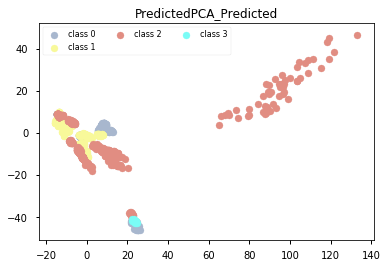

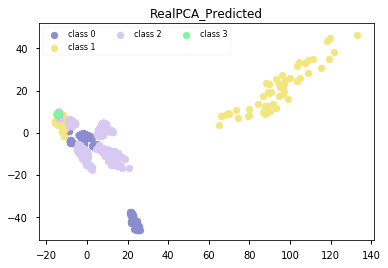

In [13]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=nClases,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors")
showR(dataset,spectral,flattenDataset,flatTest,fTrainLabels,fTestLabels)